In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('/Users/kirtan/Downloads/6 class csv.csv')

In [32]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [33]:
df.shape

(240, 7)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [35]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

# Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
LE = LabelEncoder()

In [38]:
df['Star color'] = LE.fit_transform(df['Star color'])

In [39]:
df['Spectral Class'] = LE.fit_transform(df['Spectral Class'])

# Data Visualization

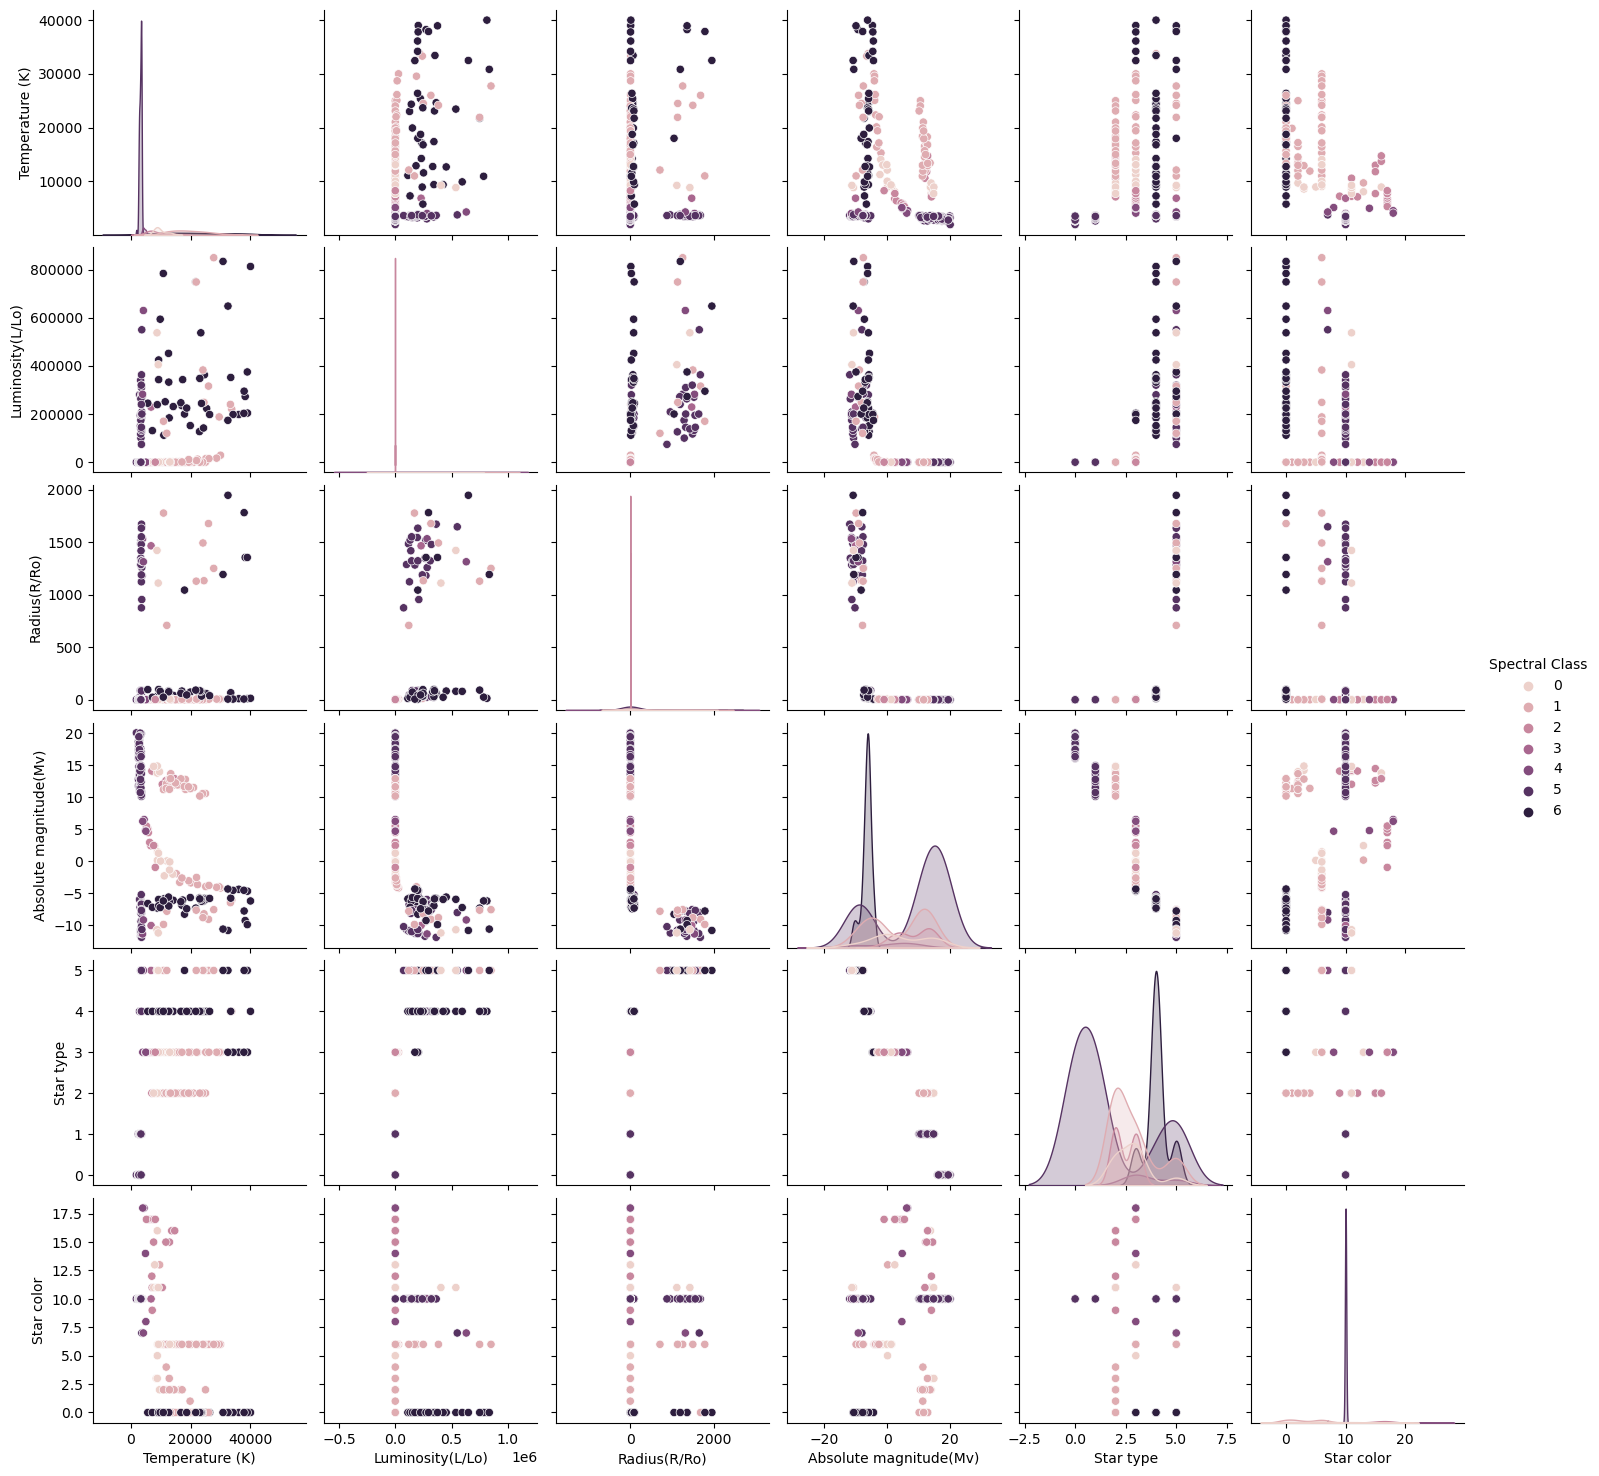

In [40]:
sns.pairplot(df,hue='Spectral Class')
plt.show()

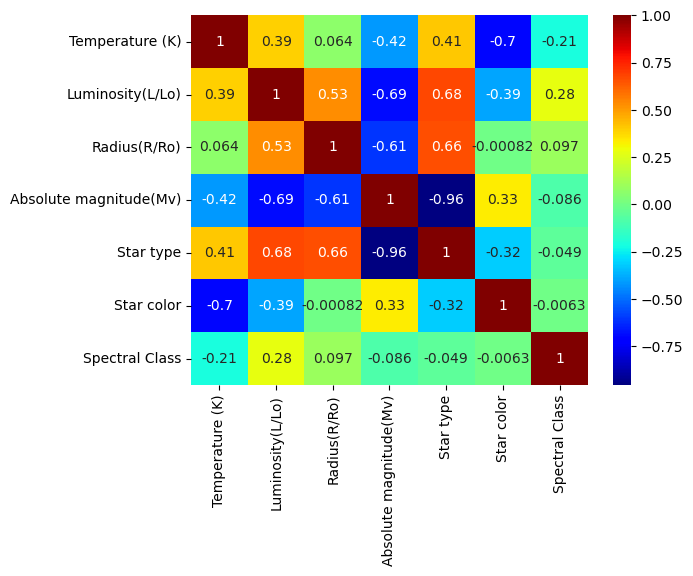

In [41]:
sns.heatmap(df.corr(),annot=True,cmap='jet')
plt.show()

# Train & Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df.iloc[:,:-1]
X

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,10
1,3042,0.000500,0.1542,16.60,0,10
2,2600,0.000300,0.1020,18.70,0,10
3,2800,0.000200,0.1600,16.65,0,10
4,1939,0.000138,0.1030,20.06,0,10
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0
236,30839,834042.000000,1194.0000,-10.63,5,0
237,8829,537493.000000,1423.0000,-10.73,5,11
238,9235,404940.000000,1112.0000,-11.23,5,11


In [44]:
y = df.iloc[:,-1:]
y

,Spectral Class
0,5
1,5
2,5
3,5
4,5
...,...
235,6
236,6
237,0
238,0


In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# XGBoost

In [77]:
from xgboost import XGBClassifier

In [78]:
XGB = XGBClassifier()

In [79]:
XGB.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [80]:
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [81]:
y_hat = XGB.predict(X_test)

# Model Evaluation

In [82]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [83]:
print(accuracy_score(y_test,y_hat))

0.9444444444444444


In [84]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.94      1.00      0.97        15
           2       0.67      0.67      0.67         3
           4       1.00      0.33      0.50         3
           5       0.97      1.00      0.99        35
           6       1.00      1.00      1.00        13

    accuracy                           0.94        72
   macro avg       0.87      0.78      0.80        72
weighted avg       0.95      0.94      0.94        72



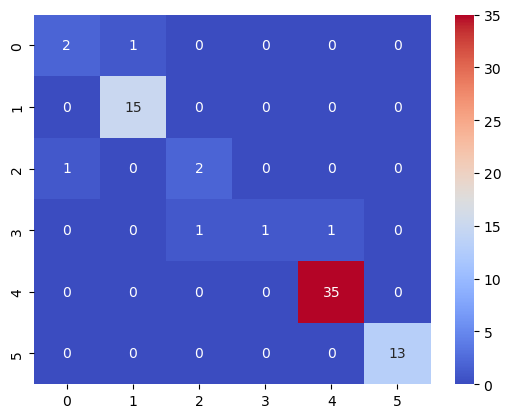

In [85]:
sns.heatmap(confusion_matrix(y_test,y_hat),annot=True,cmap='coolwarm')
plt.show()